# CODE SECTION

In [251]:
### Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
from memory_profiler import profile

In [252]:
## Starting time
start=time.time()
### Read the dataset
df=pd.read_csv('bank-additional-full.csv')

In [253]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [254]:
### Number of unique elements in each categorical variable.
for i in df.columns:
    if df[i].dtypes=='object':
        print(i,':' ,df[i].nunique())
print('....................................................................')    
print('....................................................................')   
print('\n')
### Unique elemnets in each categorical variable.
for i in df.columns:
    if df[i].dtypes=='object':
        print(i,':' ,df[i].unique())
        print('.................................................')
        print('\n')

job : 12
marital : 4
education : 8
default : 3
housing : 3
loan : 3
contact : 2
month : 10
day_of_week : 5
poutcome : 3
y : 2
....................................................................
....................................................................


job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
.................................................


marital : ['married' 'single' 'divorced' 'unknown']
.................................................


education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
.................................................


default : ['no' 'unknown' 'yes']
.................................................


housing : ['no' 'yes' 'unknown']
.................................................


loan : ['no' 'yes' 'unknown']
...........................................

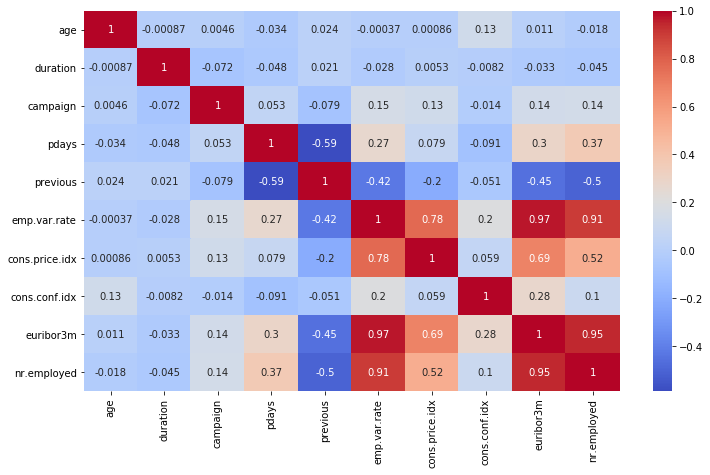

In [255]:
# Pearson Correlation
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm");

 **Here 'euribor3m','nr.employed','emp.var.rate' are highly correlated to each other. So we will only keep one of them and drop other two.Here we will keep 'euribor3m' feature.**

In [256]:
df.drop(['nr.employed','emp.var.rate'],axis=1,inplace=True)

In [257]:
### Here 79% data is'no', and almost 21% is 'unknown' (i.e, null values) and 'yes' is only .01%
###  Therefore this feature will not have any significant effect on the model.
###  So we will drop it.
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [258]:
#### Dropping 'default' column
df.drop('default',axis=1,inplace=True)

In [259]:
### Converting target variable into numerical variable.
df['y']=df['y'].replace({'yes':1,'no':0})

In [260]:
# Label encoding
df['contact']=df['contact'].replace({'telephone':0,'cellular':1})
df['month']=df['month'].replace({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9
                               ,'nov':10,'dec':11})
df['day_of_week']=df['day_of_week'].replace({'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6})

In [261]:
edu={'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'unknown':4,'high.school':5,
    'university.degree':6,'professional.course':7}
df['education']=df['education'].map(edu)

In [262]:
### Considering 999 as 0 for pdays column.
df.pdays=df.pdays.replace({999:0})

In [263]:
# One hot encoding
one_hot=['job','marital','housing','loan','poutcome']
df1=pd.get_dummies(df[one_hot],drop_first=True)

In [264]:
### Okay! Now we are adding this columns to our main data.
df=pd.concat([df,df1],axis=1)
df.drop(one_hot,axis=1,inplace=True)

In [265]:
### X is the dataframe of independent variable
### and y contains only the target variable
X=df.drop('y',axis=1)
y=df['y']

In [266]:
### Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [267]:
### Since the data is imbalanced,so we are doing a little bit oversampling.
os=RandomOverSampler(0.5)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

print('Total Preprocessing Time : ',time.time()-start,'Secs')

Total Preprocessing Time :  1.4649410247802734 Secs


In [268]:
### For Decision Tree
### calculating time for it
start1=time.time()
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(min_samples_leaf=10,max_depth=7)

In [269]:
### Calculating space 
%memit DT.fit(X_train_os,y_train_os)

peak memory: 184.55 MiB, increment: 7.62 MiB


In [270]:
y_pred=DT.predict(X_test)

In [271]:
print('For Decision Tree :: \n')
print('Confusion Matrix  \n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report  \n')
print(classification_report(y_test,y_pred))
print('Accuracy : ',round(accuracy_score(y_test,y_pred),3))
print('Precision : ',round(precision_score(y_test,y_pred),3))
print('Recall : ',round(recall_score(y_test,y_pred),3))
print('f1 : ',round(f1_score(y_test,y_pred),3))
print('Time Taken: ',time.time()-start1,'secs')

For Decision Tree :: 

Confusion Matrix  

[[6361  942]
 [ 136  799]]


Classification Report  

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7303
           1       0.46      0.85      0.60       935

    accuracy                           0.87      8238
   macro avg       0.72      0.86      0.76      8238
weighted avg       0.92      0.87      0.89      8238

Accuracy :  0.869
Precision :  0.459
Recall :  0.855
f1 :  0.597
Time Taken:  2.008805513381958 secs


In [272]:
### For Random Forest
### calculating time for it
start2=time.time()
from sklearn.ensemble import RandomForestClassifier
rf_cl=RandomForestClassifier(max_depth=7)

In [273]:
### calculating space
%memit rf_cl.fit(X_train_os,y_train_os)

peak memory: 187.56 MiB, increment: 7.04 MiB


In [274]:
y_pred1=rf_cl.predict(X_test)

In [275]:
print('For Random Forest :: \n')
print('Confusion Matrix  \n')
print(confusion_matrix(y_test,y_pred1))
print('\n')
print('Classification Report  \n')
print(classification_report(y_test,y_pred1))
print('Accuracy : ',round(accuracy_score(y_test,y_pred1),3))
print('Precision : ',round(precision_score(y_test,y_pred1),3))
print('Recall : ',round(recall_score(y_test,y_pred1),3))
print('f1 : ',round(f1_score(y_test,y_pred1),3))
print('Time Taken: ',time.time()-start2,'secs')

For Random Forest :: 

Confusion Matrix  

[[6642  661]
 [ 223  712]]


Classification Report  

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7303
           1       0.52      0.76      0.62       935

    accuracy                           0.89      8238
   macro avg       0.74      0.84      0.78      8238
weighted avg       0.92      0.89      0.90      8238

Accuracy :  0.893
Precision :  0.519
Recall :  0.761
f1 :  0.617
Time Taken:  2.884699821472168 secs


In [276]:
#### For Naive Bayes
#### Calculating time for it
start3=time.time()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [277]:
### calculating space
%memit gnb.fit(X_train_os,y_train_os)

peak memory: 198.27 MiB, increment: 15.95 MiB


In [278]:
y_pred2=gnb.predict(X_test)

In [279]:
print('For Naive Bayes :: \n')
print('Confusion Matrix  \n')
print(confusion_matrix(y_test,y_pred2))
print('\n')
print('Classification Report  \n')
print(classification_report(y_test,y_pred2))
print('Accuracy  : ',round(accuracy_score(y_test,y_pred2),3))
print('Precision : ',round(precision_score(y_test,y_pred2),3))
print('Recall    : ',round(recall_score(y_test,y_pred2),3))
print('f1_score  : ',round(f1_score(y_test,y_pred2),3))
print('Time Taken: ',time.time()-start3,'secs')

For Naive Bayes :: 

Confusion Matrix  

[[6458  845]
 [ 444  491]]


Classification Report  

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7303
           1       0.37      0.53      0.43       935

    accuracy                           0.84      8238
   macro avg       0.65      0.70      0.67      8238
weighted avg       0.87      0.84      0.86      8238

Accuracy  :  0.844
Precision :  0.368
Recall    :  0.525
f1_score  :  0.432
Time Taken:  1.4720520973205566 secs


**Thank You**